In [1]:
import pandas as pd 
import forestplot as fp
print(fp.__version__)
import matplotlib.pyplot as plt
def save_mpl_fig(savepath):
    plt.savefig(f"{savepath}.pdf", dpi=None, bbox_inches="tight", pad_inches=0)
    plt.savefig(f"{savepath}.png", dpi=120, bbox_inches="tight", pad_inches=0)

varlabels = [
    "Female",
    "Age cohort",
    "Hispanic/Latin",
    "HS diploma",
    "Some college",
    "Four-year college",
    "Post-graduate",
    "Asian",
    "Black",
    "White",
    "Political interest",
    "Intention to vote",
    "Political leaning",
]

grouplabels = [
    "Other",
    "Other",
    "Other",
    "Education",
    "Education",
    "Education",
    "Education",
    "Race",
    "Race",
    "Race",
    "Politics",
    "Politics",
    "Politics",
]

0.2.1


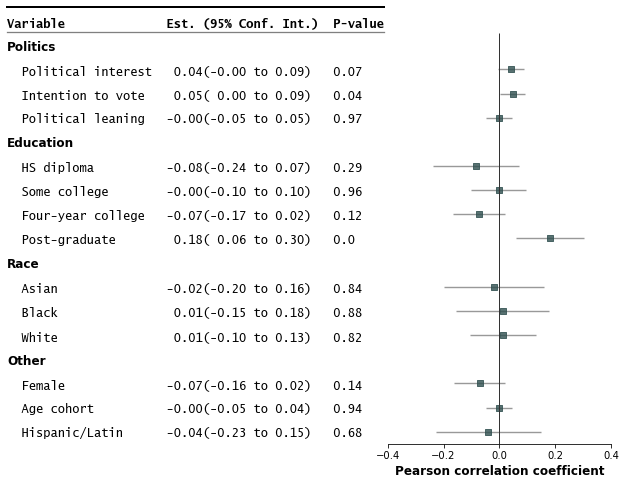

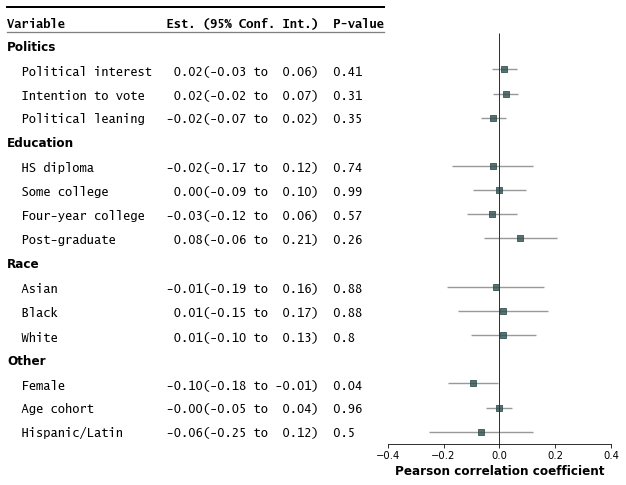

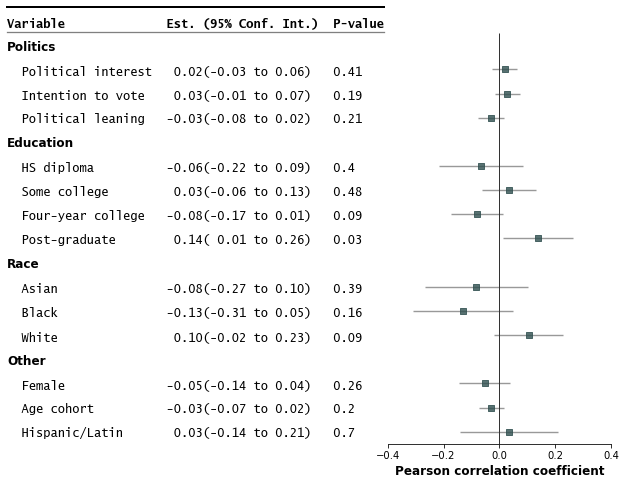

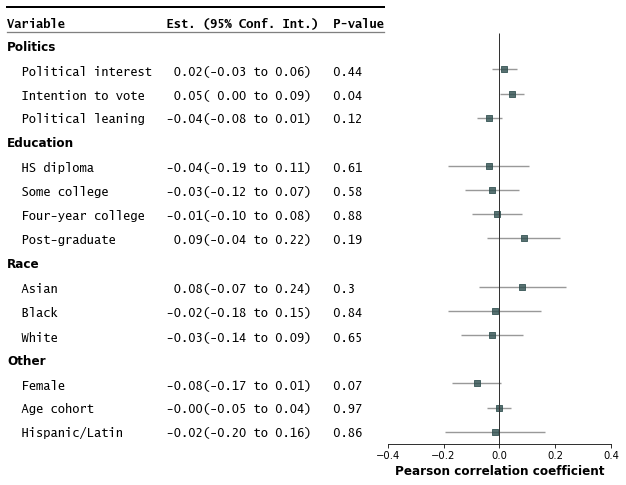

In [2]:
for comparison in ["RW", "FSR", "14k", "24k"]:
    dtafile = f"../../data/turk/storespecs-baltest-{comparison}-ips.dta"
    df = (pd.read_stata(dtafile)
          .assign(
              varlabel=varlabels,
              grouplabel=grouplabels,
              pval=lambda df: df.pval.round(2)
          )
         ) 
    
    fp.forestplot(df,  # the dataframe with results data
                  estimate="beta",  # col containing estimated effect size 
                  ll="l95", hl="u95",  # lower & higher limits of conf. int.
                  varlabel="varlabel",  # column containing the varlabels to be printed on far left
                  groupvar="grouplabel",
                  group_order=["Politics", "Education", "Race", "Other"],
                  annote=["est_ci", "pval",],
                  xticks=[-.4, -.2, 0, .2, .4],
                  annoteheaders=["Est. (95% Conf. Int.)", "P-value"],  # ^corresponding headers
                  xlabel="Pearson correlation coefficient",  # x-label title
                  table=True,  # Format as a table
                  )
    
    save_mpl_fig(f"../../figs/study1-baltest-{comparison}-ips")